In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\dataset\AutoInsurance.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.shape

(9134, 24)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer Lifetime Value        9134 non-null   float64
 1   Coverage                       9134 non-null   object 
 2   Education                      9134 non-null   object 
 3   Effective To Date              9134 non-null   object 
 4   EmploymentStatus               9134 non-null   object 
 5   Gender                         9134 non-null   object 
 6   Income                         9134 non-null   int64  
 7   Marital Status                 9134 non-null   object 
 8   Monthly Premium Auto           9134 non-null   int64  
 9   Months Since Last Claim        9134 non-null   int64  
 10  Months Since Policy Inception  9134 non-null   int64  
 11  Number of Open Complaints      9134 non-null   int64  
 12  Number of Policies             9134 non-null   i

FEATURE ENGINEERING

In [3]:
df.drop(['Customer','Response','State','Location Code'],axis=1,inplace=True)

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Coverage']=le.fit_transform(df['Coverage'])
df['Education']=le.fit_transform(df['Education'])
df['Effective To Date']=le.fit_transform(df['Effective To Date'])
df['EmploymentStatus']=le.fit_transform(df['EmploymentStatus'])
df['Gender']=le.fit_transform(df['Gender'])
df['Marital Status']=le.fit_transform(df['Marital Status'])
df['Policy Type']=le.fit_transform(df['Policy Type'])
df['Policy']=le.fit_transform(df['Policy'])
df['Renew Offer Type']=le.fit_transform(df['Renew Offer Type'])
df['Sales Channel']=le.fit_transform(df['Sales Channel'])
df['Vehicle Class']=le.fit_transform(df['Vehicle Class'])
df['Vehicle Size']=le.fit_transform(df['Vehicle Size'])

In [5]:
df.isnull().sum()

Customer Lifetime Value          0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [21]:
df.duplicated().sum()

np.int64(512)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
x=df[['Income','Monthly Premium Auto']]

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)

CONVERTING TO DATAFRAME

In [ ]:
#dataframe converts the dataset to 2d array and it helps to reduce the storage space

In [10]:
x=pd.DataFrame(df)
x.head()

,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,2763.519279,0,0,40,1,0,56274,1,69,32,5,0,1,0,2,0,0,384.811147,5,1
1,6979.535903,1,0,20,4,0,0,2,94,13,42,0,8,1,5,2,0,1131.464935,0,1
2,12887.431650,2,0,34,1,0,48767,1,108,18,38,0,2,1,5,0,0,566.472247,5,1
3,7645.861827,0,0,9,4,1,0,1,106,18,65,0,7,0,1,0,2,529.881344,3,1
4,2813.692575,0,0,46,1,1,43836,2,73,12,44,0,1,1,3,0,0,138.130879,0,1


KMEANS CLUSTERING

In [ ]:
#it performs 1 grouping at first
#it is a unsupervised ml algorithm which groups unlabeled dataset into diff clusters.
#it is used to organize data into groups based on their similarity

KMEANS WITHOUT N CLUSTERS

In [11]:
from sklearn.cluster import KMeans
km=KMeans(random_state=1)
km.fit(x)

KMeans(random_state=1)

In [ ]:
#cluster centre also known as centroid represents a cental point of a cluster

In [12]:
km.cluster_centers_

array([[7.00838963e+03, 4.90691489e-01, 1.52171986e+00, 2.84552305e+01,
        3.92863475e+00, 5.10638298e-01, 3.00767730e+02, 1.49202128e+00,
        9.30079787e+01, 1.52588652e+01, 4.89521277e+01, 3.82535461e-01,
        3.02304965e+00, 8.23581560e-01, 3.77304965e+00, 8.00975177e-01,
        1.08200355e+00, 5.91729555e+02, 1.86657801e+00, 1.09042553e+00],
       [7.09914137e+03, 5.08845830e-01, 1.59561921e+00, 2.89890480e+01,
        1.00000000e+00, 4.81887110e-01, 5.61678644e+04, 1.02695872e+00,
        9.37885425e+01, 1.52990733e+01, 4.97919124e+01, 3.85004212e-01,
        2.96967144e+00, 8.03706824e-01, 3.73294019e+00, 1.02695872e+00,
        1.09519798e+00, 3.66881002e+02, 1.84077506e+00, 1.09098568e+00],
       [7.21148150e+03, 4.53488372e-01, 1.55000000e+00, 2.87465116e+01,
        1.00000000e+00, 4.87209302e-01, 9.07137744e+04, 1.01511628e+00,
        9.01709302e+01, 1.41162791e+01, 4.81186047e+01, 3.98837209e-01,
        2.98488372e+00, 8.41860465e-01, 3.81744186e+00, 1.1860

In [13]:
km.inertia_

400527597996.1064

In [14]:
labels=km.labels_
labels

array([1, 0, 1, ..., 0, 3, 0], shape=(8622,), dtype=int32)

In [15]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,km.labels_)
print(score)

0.5226624248107776


ELBOW METHOD

In [ ]:
#elbow method is used for optimizing k value
#WCSS (WITHIN CLUSTER SUM OF SQUARES)- sum of squared distance between each datapoint

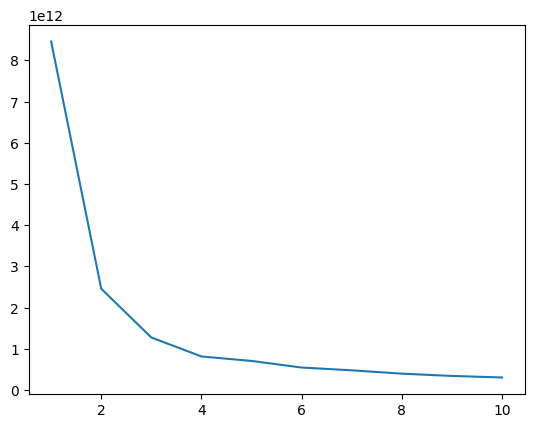

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=1)
    km.fit(df)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

In [25]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2,random_state=5)
km.fit(df)
labels=km.labels_
labels

array([0, 1, 0, ..., 1, 1, 1], shape=(8622,), dtype=int32)

In [26]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,km.labels_)
print(score)

0.5915384354526825


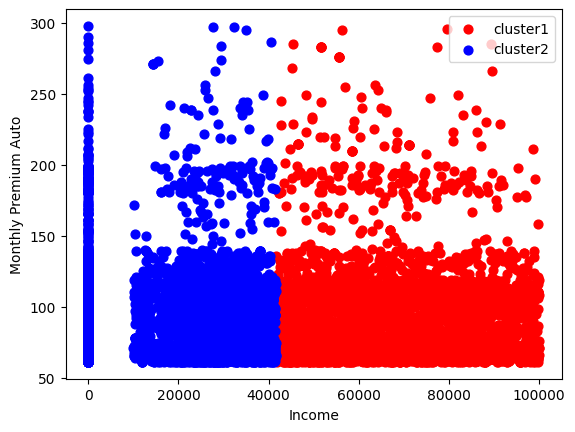

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
x=df[['Income','Monthly Premium Auto']]
plt.scatter(x[km.labels_==0]['Income'],x[km.labels_==0]['Monthly Premium Auto'],s=40,c='red',label='cluster1')
plt.scatter(x[km.labels_==1]['Income'],x[km.labels_==1]['Monthly Premium Auto'],s=40,c='blue',label='cluster2')
plt.xlabel('Income')
plt.ylabel('Monthly Premium Auto')
plt.legend()
plt.show()

In [ ]:
#cluster1 - high income with high monthly premium
#cluster2 - low income with medium monthly premium
#cluster3 - medium income with high monthly premium

HIERARCHICAL CLUSTERING (AGGLOMERATIVE CLUSTERING)

In [ ]:
#it is a unsupervised learning method
#performs 2 grouping to analyze the model

In [ ]:
#agglomerative clustering means sequentially merging similar clusters
#identify the 2 clusters that are closest and merge the 2 most similar clusters

In [ ]:
#dendrogram is used to show the arrangement of clusters produced my hierarchical clustering
#used the linkage method called ward because clusters are perfectly arranged only in ward linkage
# also it is a default linkage method

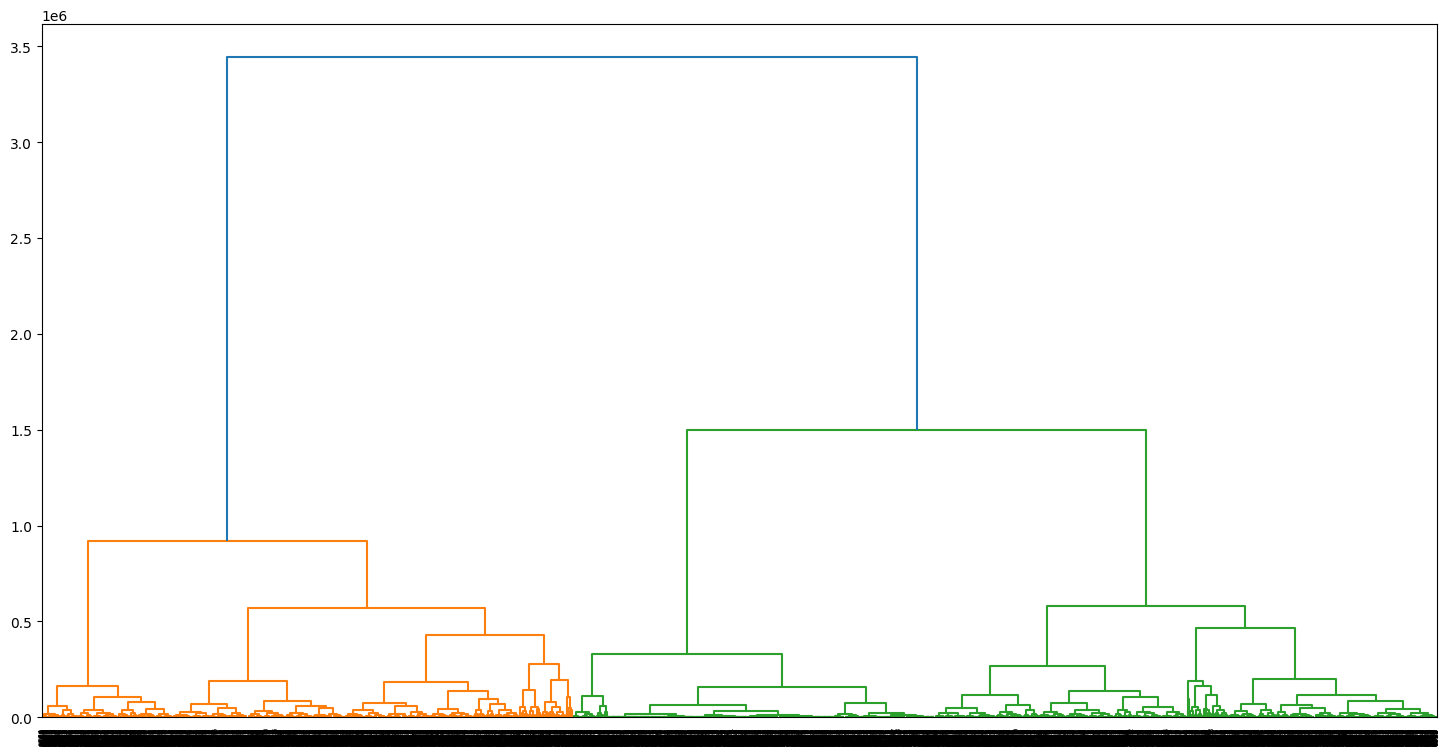

In [55]:
import scipy.cluster.hierarchy as hi
import matplotlib.pyplot as plt
plt.figure(figsize=(18,9))
dendrogram=hi.dendrogram(hi.linkage(df,method='ward'))
plt.show()

ELBOW METHOD

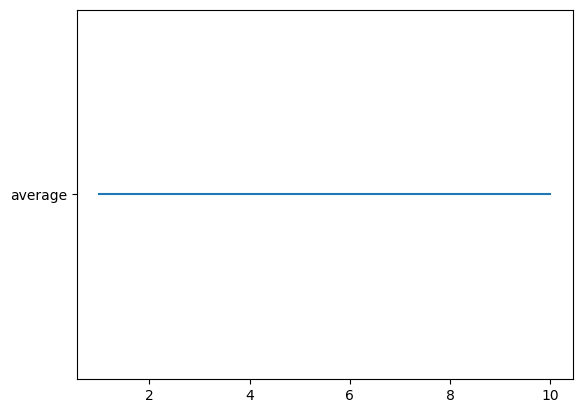

In [16]:
from sklearn.cluster import AgglomerativeClustering
wcss=[]
for i in range(1,11):
    agg=AgglomerativeClustering(n_clusters=i,linkage='average')
    agg.fit(df)
    wcss.append(agg.linkage)
plt.plot(range(1,11),wcss)
plt.show()

SILHOUETTE SCORE FOR VARIOUS LINKAGE METHOD

In [17]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,linkage='average')
y=agg.fit_predict(df)
y

array([1, 2, 1, ..., 2, 2, 2], shape=(8622,))

In [18]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,y)
print(score)

0.4643758370505382


In [22]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,linkage='single')
y=agg.fit_predict(df)
y

array([0, 1, 0, ..., 1, 0, 1], shape=(8622,))

In [23]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,y)
print(score)

0.4186428386043072


In [24]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=5,linkage='ward')
y=agg.fit_predict(df)
y

array([0, 2, 4, ..., 2, 1, 2], shape=(8622,))

In [25]:
from sklearn.metrics import silhouette_score
score=silhouette_score(df,y)
print(score)

0.45366036428471107


In [ ]:
#SILHOUETTE SCORE FOR AVERAGE(COMPLETE) LINKAGE IS HIGH WHEN COMPARED TO OTHER LINKAGES-46%

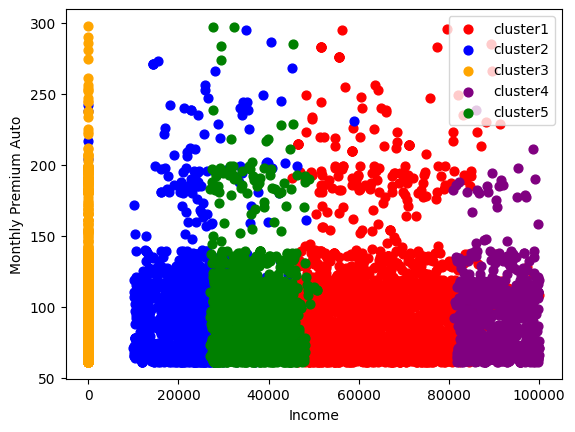

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
x=df[['Income','Monthly Premium Auto']]
plt.scatter(x[y==0]['Income'],x[y==0]['Monthly Premium Auto'],s=40,c='red',label='cluster1')
plt.scatter(x[y==1]['Income'],x[y==1]['Monthly Premium Auto'],s=40,c='blue',label='cluster2')
plt.scatter(x[y==2]['Income'],x[y==2]['Monthly Premium Auto'],s=40,c='orange',label='cluster3')
plt.scatter(x[y==3]['Income'],x[y==3]['Monthly Premium Auto'],s=40,c='purple',label='cluster4')
plt.scatter(x[y==4]['Income'],x[y==4]['Monthly Premium Auto'],s=40,c='green',label='cluster5')
plt.xlabel('Income')
plt.ylabel('Monthly Premium Auto')
plt.legend()
plt.show()

In [ ]:
#cluster1 - high income with high monthly premium
#cluster2 - low income with high monthly premium
#cluster3 - grouping doesn't happen
#cluster4 - high income with medium monthly premium
#cluster5 - medium income with high monthly premium

DBSCAN-DENSITY BASED SPATIAL CLUSTERING OF APPLICATIONS WITH NOISE

In [ ]:
#DBSCAN groups together points that are closely packed and marks points in low density areas as noise
#unlike kmeans we need not choose n_clusters
#less sensitiove to noise(outlayers) compared to other clustering algorithms

In [27]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=1,min_samples=4)
db.fit(df)

DBSCAN(eps=1, min_samples=4)

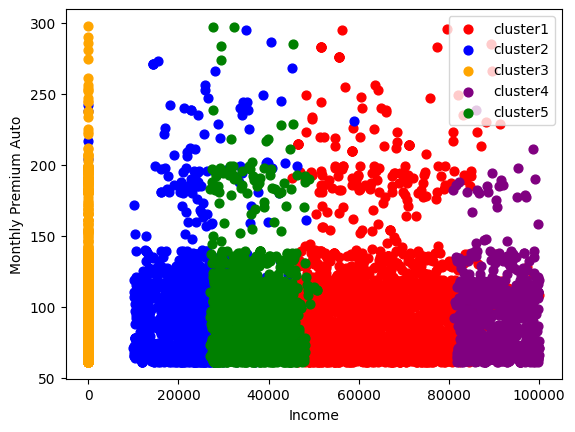

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
x=df[['Income','Monthly Premium Auto']]
plt.scatter(x[y==0]['Income'],x[y==0]['Monthly Premium Auto'],s=40,c='red',label='cluster1')
plt.scatter(x[y==1]['Income'],x[y==1]['Monthly Premium Auto'],s=40,c='blue',label='cluster2')
plt.scatter(x[y==2]['Income'],x[y==2]['Monthly Premium Auto'],s=40,c='orange',label='cluster3')
plt.scatter(x[y==3]['Income'],x[y==3]['Monthly Premium Auto'],s=40,c='purple',label='cluster4')
plt.scatter(x[y==4]['Income'],x[y==4]['Monthly Premium Auto'],s=40,c='green',label='cluster5')
plt.xlabel('Income')
plt.ylabel('Monthly Premium Auto')
plt.legend()
plt.show()

In [ ]:
#cluster1 - high income with high monthly premium
#cluster2 - low income with high monthly premium
#cluster3 - grouping doesn't happen
#cluster4 - high income with medium monthly premium
#cluster5 - medium income with high monthly premium